# Chem 301 Numerical Kinetics Activity - Part 2

Below is the code for the autocatalized reaction.  Follow the instructions in the lab handout for more information.

Here, we assume the mechanism is

$ A+B \rightarrow 2B $

$ B+C \rightarrow 2C $

$  C  \rightarrow D $

You can visualize $A$ as food, like corn, $B$ as mice, $C$ as snakes, and $D$ is as the snakes dying.  Now, there are lots of reasonable starting conditions, but obviously you need to have some food, mice and snakes present initially.  The three rate constants correspond to how fast the mice eat the food, how fast the snakes eat the mice, and how fast the snakes die (of "natural causes").

Moreover, you can have different scenarios for food.  The first is that there is a constant source of food ($i.e.$ the pile never goes away and has some constant amount of food).  This is not very realistic, so you can change the condition so that there is a finite pile of food that can get eaten and then is gone forever.  A third option would be to have a cyclic food supply like seasons of the year, so food is available at some times, but unavilabile at other times - this can be modeled with a sin/cos wave.  In this script, you can change between these food options by commenting/uncommenting out the relavant lines by adding/removing the '#'.

Text(0.5, 1.0, 'Title')

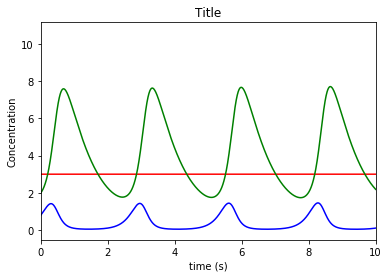

In [5]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt



A0 = 3.0 
B0 = 0.8 
C0 = 2.0 
D0 = 0
k1 = 1.0 #
k2 = 1.5 # 
k3 = 1.2 # 


timesteps = np.arange(0,150,0.001)
A = np.zeros(np.size(timesteps))
B = np.zeros(np.size(timesteps))
C = np.zeros(np.size(timesteps))
D = np.zeros(np.size(timesteps))
A[0] = A0
B[0] = B0
C[0] = C0
D[0] = D0

for i in range(np.size(timesteps)):
    if i > 0:
# Option for food that is always there (infinite food)
        A[i] = A[0]
    
# Option for food that starts as a pile that gets eaten and is gone forever.
#        A[i] = A[i-1] - k1*A[i-1]*B[i-1]*(timesteps[i]-timesteps[i-1])

# Option for food that is cyclical (like seasons of the year)
#        A[i] = 0.1+0.1*np.cos(i/500)

        B[i] = B[i-1] + 2*k1*A[i-1]*B[i-1]*(timesteps[i]-timesteps[i-1]) - k2*B[i-1]*C[i-1]*(timesteps[i]-timesteps[i-1])
        C[i] = C[i-1] + 2*k2*B[i-1]*C[i-1]*(timesteps[i]-timesteps[i-1]) - k3*C[i-1]*(timesteps[i]-timesteps[i-1])
        D[i] = D[i-1] + k3*C[i-1]*(timesteps[i]-timesteps[i-1])
        
plt.plot(timesteps,A,color='red')
plt.plot(timesteps,B,color='blue')
plt.plot(timesteps,C,color='green')
plt.xlim(0,10)
#plt.plot(timesteps,D,color='black')
        
plt.ylabel("Concentration")
plt.xlabel("time (s)")
plt.title("Title")
 
